Best labels: {'A': 0, 'B': 1, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
Minimum weight: 1


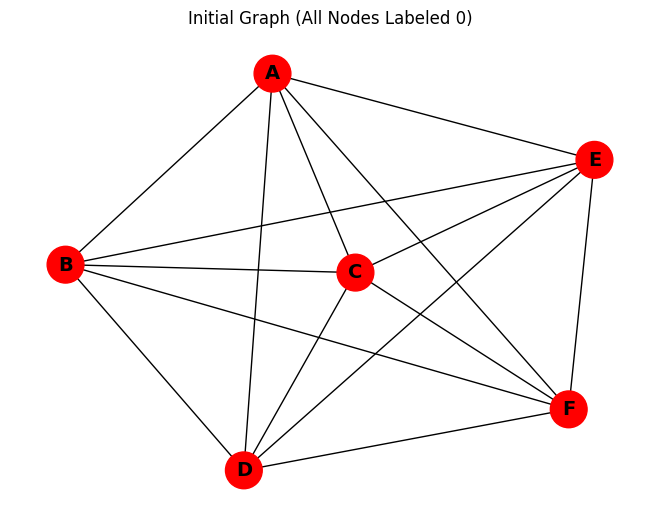

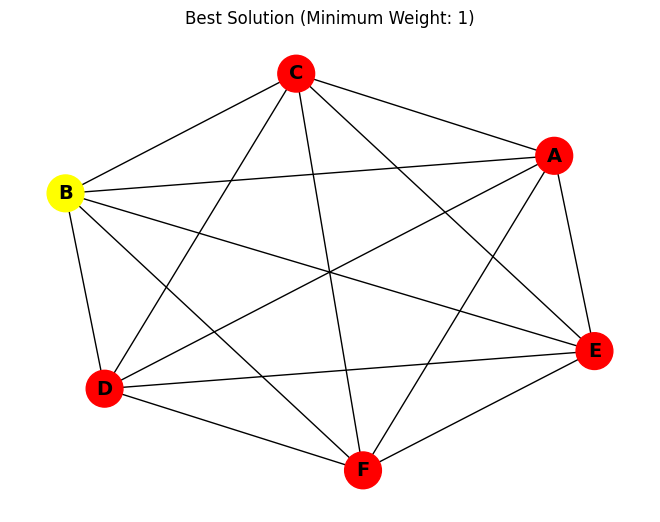

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Corrected graph definition
graph = {
    'A': ['B', 'C', 'D', 'E', 'F'],
    'B': ['A', 'C', 'D', 'E', 'F'],
    'C': ['A', 'B', 'D', 'E', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['A', 'B', 'C', 'D', 'F'],
    'F': ['A', 'B', 'C', 'D', 'E']
}

# Define necessary functions for the ABC algorithm (simplified version for illustration)
def generate_random_solution(vertices):
    return {vertex: random.choice([0, 1, 2]) for vertex in vertices}

def is_valid_htrdf(graph, labels):
    for node, neighbors in graph.items():
        if labels[node] == 0 and not any(labels[neighbor] > 0 for neighbor in neighbors):
            return False
    return True

def weight(labels):
    return sum(labels.values())

def abc_algorithm(graph, num_bees=50, max_iterations=100):
    vertices = list(graph.keys())
    population = [generate_random_solution(vertices) for _ in range(num_bees)]
    fitness = [weight(solution) if is_valid_htrdf(graph, solution) else float('inf') for solution in population]
    trial = [0] * num_bees

    for iteration in range(max_iterations):
        for i in range(num_bees):
            if fitness[i] != float('inf'):
                new_solution = generate_random_solution(vertices)
                new_fitness = weight(new_solution) if is_valid_htrdf(graph, new_solution) else float('inf')
                if new_fitness < fitness[i]:
                    population[i] = new_solution
                    fitness[i] = new_fitness
                    trial[i] = 0
                else:
                    trial[i] += 1

        best_solution = min(zip(population, fitness), key=lambda x: x[1])
        if best_solution[1] != float('inf'):
            return best_solution[0], best_solution[1]

    return None, float('inf')

best_labels, min_weight = abc_algorithm(graph)
print("Best labels:", best_labels)
print("Minimum weight:", min_weight)

def visualize_graph(graph, labels, title):
    G = nx.Graph(graph)
    color_map = {0: 'red', 1: 'yellow', 2: 'green'}
    node_colors = [color_map[labels[node]] for node in G.nodes()]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=14, font_color='black', font_weight='bold')
    plt.title(title)
    plt.show()

# Visualize the initial graph
visualize_graph(graph, {node: 0 for node in graph}, "Initial Graph (All Nodes Labeled 0)")

# Visualize the graph with the best labels found
visualize_graph(graph, best_labels, f"Best Solution (Minimum Weight: {min_weight})")